### **Introduction and Problem Statement**
- The task is to clean the data and prepare it for exploratory data analysis. 
- Then using a classification model like Logistic Regression or Decision Tree Classifier to predict the target column.
- Also to Visualize the features using matplotlib or seaborn to understand their distribution.
- The goal is to predict the target variable based on the given features.

### **Data Understanding and Description**
- The dataset named Loan Prediction Dataset available on Kaggle is used for this task. This dataset has two files train and test so train_set is used in this task. 
- Dataset has 12 columns and 367 rows.
- It has the target column named 'Loan_Status' which is either yes or no in sense of approval.
- It has several nan or missing values in its features which are handled using mode calculation.

In [ ]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [ ]:
data=pd.read_csv('train_set.csv') # Laod Data set
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
print("Missing Values: ",data.isnull().sum()) # Identifying missing values in the dataset

Missing Values:  Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [ ]:
data["Dependents"]=data["Dependents"].replace("3+",3) # Data Transformation for cleaning purpose

In [ ]:
# Handling missing values by filling them with mode of the respective column, can also drop them or do forward fill or backfill
miss_cols=["Gender","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History","Married"]
for col in miss_cols:
    freq_occur=data[col].mode()[0]
    data[col]=data[col].fillna(freq_occur)
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

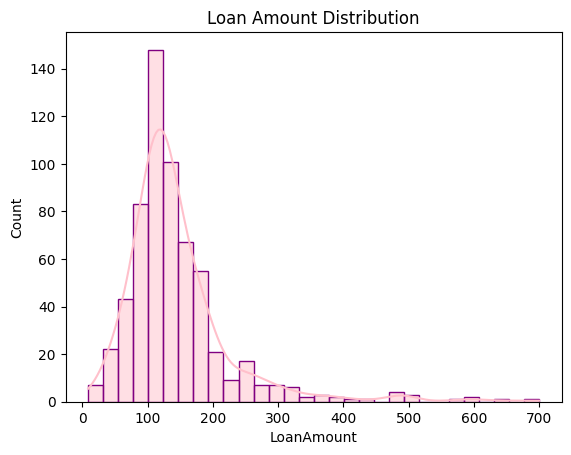

In [43]:
sns.histplot(data["LoanAmount"],bins=30,kde=True,edgecolor="Purple",color="Pink")
mp.title('Loan Amount Distribution')
mp.show()

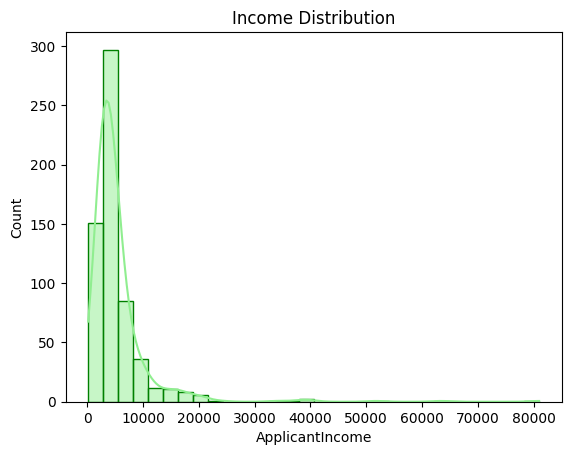

In [44]:
sns.histplot(data["ApplicantIncome"],bins=30,kde=True,edgecolor="green",color="lightgreen")
mp.title('Income Distribution')
mp.show()

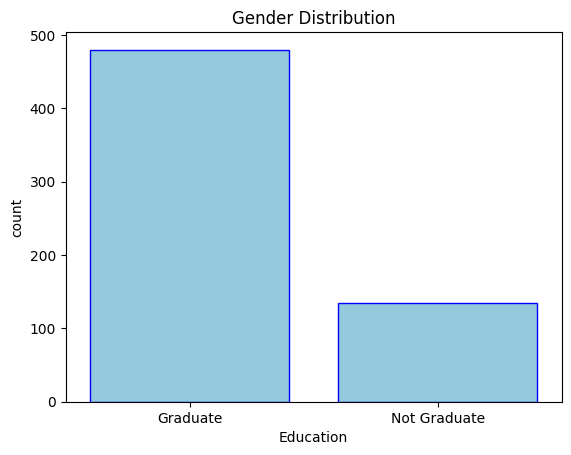

In [45]:
sns.countplot(x="Education",data=data,color="skyBlue",edgecolor="blue")
mp.title('Gender Distribution')
mp.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Encoding Categorical Columns using Label Encoder from sklearn
cols=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
label_encoder=LabelEncoder()
for i in cols:
    data[i]=label_encoder.fit_transform(data[i])

In [ ]:
X=data.drop("Loan_Status",axis=1) # Dropping target column from training  X set
X=X.drop("Loan_ID",axis=1) # Un-necessary Column
Y=data["Loan_Status"]
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          0              0             5849   
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          3          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) # Splitting the dataset into 80% train and 20% test set. 
X_train.shape, X_test.shape

((491, 11), (123, 11))

In [ ]:
# Scale the columns having values in larger range so that to remove the effect of larger values. MinMax scaling can also be used.
numeric_cols = ['LoanAmount','Loan_Amount_Term', 'ApplicantIncome','CoapplicantIncome']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,1,1,0,0,0,0.083915,0.180667,1.357619,0.287611,1.0,1
90,1,1,0,0,0,-0.429338,0.385430,-0.194424,0.287611,1.0,1
227,1,1,2,0,0,0.126095,0.005831,0.720586,0.287611,1.0,1
482,1,1,0,0,0,-0.576970,0.464185,-0.229171,0.287611,1.0,1
464,1,0,0,0,0,-0.225522,-0.528127,-0.576644,0.287611,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,-0.612064,0.062535,-0.588226,0.287611,1.0,1
106,1,1,2,0,0,0.997882,-0.173415,0.894323,0.287611,1.0,2
270,0,0,0,0,0,-0.382264,-0.528127,-1.364248,0.287611,1.0,2
435,0,1,0,0,0,0.766733,-0.528127,-0.321831,-1.506760,1.0,1


In [ ]:
model = LogisticRegression(max_iter=1000) # using logistic regression
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### **Key Insights**
- Model used is Logistic Regression.
- Its accuracy is **0.788617**(78%).
- Some of the features have no importance in accordance to the target variable so they are removed from the model.
- Evaluation metrics used are accuracy, confusion matrix and classification report.
